In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

import numpy as np

In [3]:
# lecture avec pandas
data1 = pd.read_csv('./heart.csv')
for col in data1.columns:
    print("Nom de l'attribut :", col)
    print("Type de l'attribut :", data1[col].dtype)
    print("Valeurs distinctes :", data1[col].unique())

Nom de l'attribut : age
Type de l'attribut : int64
Valeurs distinctes : [60 35 41 55 56 44 52 57 54 48 49 64 50 58 66 40 69 59 42 61 71 51 65 53
 46 45 39 47 62 63 34 29 43 67 68 37 74 76 70 38 77]
Nom de l'attribut : sex
Type de l'attribut : int64
Valeurs distinctes : [1 0]
Nom de l'attribut : cp
Type de l'attribut : int64
Valeurs distinctes : [3 2 1 0]
Nom de l'attribut : trtbps
Type de l'attribut : int64
Valeurs distinctes : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154]
Nom de l'attribut : chol
Type de l'attribut : int64
Valeurs distinctes : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 28

In [4]:
# Affichage des donnees avec pandas
data1.head(-5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,60,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,35,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,55,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,56,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,61,1,0,138,166,0,0,125,1,3.6,1,1,2,0
280,42,1,0,136,315,0,1,125,1,1.8,1,0,1,0
281,50,1,0,128,204,1,1,156,1,1.0,1,0,0,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0


### Min (Minimum) :
Le minimum d'un ensemble de données est la valeur la plus petite.

Min = min(x₁, x₂, ..., xₙ)
Où x₁, x₂, ..., xₙ sont les valeurs de l'ensemble de données.

### Max (Maximum):
Le maximum d'un ensemble de données est la valeur la plus grande.

Max = max(x₁, x₂, ..., xₙ)
Où x₁, x₂, ..., xₙ sont les valeurs de l'ensemble de données.

###  Médiane:

La médiane d'un ensemble de données est la valeur qui divise l'ensemble en deux groupes de taille égale, avec la moitié des valeurs inférieures ou égales à la médiane et l'autre moitié supérieures ou égales à la médiane.

Si n (nombre de valeurs) est impair :
Médiane = (n + 1) / 2 ème valeur triée

Si n est pair :
Médiane = Moyenne des ((n / 2) ème et ((n / 2) + 1) ème valeurs triées)

###  Q1 (Premier quartile):

Le premier quartile est la valeur qui divise l'ensemble de données en quatre groupes de taille égale, avec 25% des valeurs inférieures à Q1 et 75% supérieures.

Si n (nombre de valeurs) est divisible par 4 :
Q1 = (n / 4) ème valeur triée

Sinon :
Q1 = Moyenne des ((n + 3) / 4) ème et ((n + 4) / 4) ème valeurs triées)


### Q3 (Troisième quartile):

Le troisième quartile est la valeur qui divise l'ensemble de données en quatre groupes de taille égale, avec 75% des valeurs inférieures à Q3 et 25% supérieures.

Si n (nombre de valeurs) est divisible par 4 :
Q3 = (3n / 4) ème valeur triée

Sinon :
Q3 = Moyenne des ((3n + 1) / 4) ème et ((3n + 2) / 4) ème valeurs triées)

In [5]:
# Le Min, le max, le Median , Q1 et Q3
min_value = data1["age"].min()
max_value = data1["age"].max()
median_value = data1["age"].median()
q1_value = data1["age"].quantile(0.25)  # 25th percentile
q3_value = data1["age"].quantile(0.75)  # 75th percentile

In [6]:
print("Min:", min_value)
print("Max:", max_value)
print("Median:", median_value)
print("Q1:", q1_value)
print("Q3:", q3_value)

Min: 29
Max: 77
Median: 54.0
Q1: 47.0
Q3: 60.0


### diagramme à moustaches (les boxplots)
Un diagramme en boîte (aussi appelé diagramme à moustaches) est une manière visuelle de représenter la distribution d'un ensemble de données. Il montre les quartiles (et la médiane), et met également en évidence les valeurs aberrantes. 

#### Explication des éléments :
Boîte : La boîte elle-même représente l'écart interquartile (EIQ), qui contient les 50 % centraux des données.

Bas de la boîte : Le 25e centile (Q1). 25 % des données se situent en dessous de ce point.

Haut de la boîte : Le 75e centile (Q3). 75 % des données se situent en dessous de ce point.

Ligne à l'intérieur de la boîte : La médiane (Q2). La valeur centrale de l'ensemble de données.

Moustaches : Les moustaches s'étendent de la boîte jusqu'au point de données le plus éloigné dans une plage définie. 
Elles montrent l'étendue typique des données. 

Valeurs aberrantes (ou outliers) : Les points individuels tracés à l'extérieur des moustaches sont considérés comme des valeurs aberrantes. Ils sont souvent définis comme des points de données qui se situent en dessous de Q1 ou au-dessus de Q3. Ces points sont souvent examinés de plus près, car ils peuvent représenter des erreurs dans les données ou des valeurs réellement inhabituelles.

#### Ce que les diagrammes en boîte vous disent :

Tendance centrale : La ligne médiane à l'intérieur de la boîte vous donne une idée du centre des données.

Dispersion ou variabilité : L'EIQ (la hauteur de la boîte) montre la dispersion des 50 % centraux des données. Une 
boîte plus haute signifie plus de variabilité.

Asymétrie : La position de la ligne médiane dans la boîte peut indiquer une asymétrie :

Médiane plus proche du bas : Asymétrie positive (queue plus longue à droite).

Médiane plus proche du haut : Asymétrie négative (queue plus longue à gauche).

Médiane au centre : Distribution à peu près symétrique.

Valeurs aberrantes : Les diagrammes en boîte identifient clairement les valeurs aberrantes, ce qui peut être utile pour le nettoyage des données ou la détection d'anomalies.

Comparaison : Vous pouvez facilement comparer les distributions de plusieurs ensembles de données en traçant leurs diagrammes en boîte côte à côte.

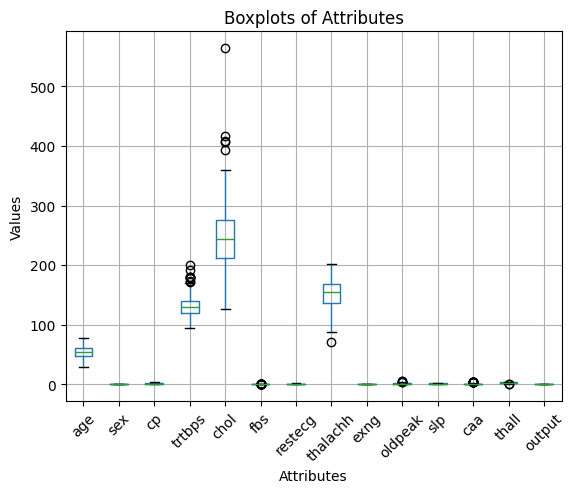

In [7]:
# with matplotlib
# Create a boxplot of each attribute
data1.boxplot()
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a title and labels
plt.title('Boxplots of Attributes')
plt.xlabel('Attributes')
plt.ylabel('Values')

# Show the plot
plt.show()

###  Nuage de points (scatter plot)
Un nuage de points (ou diagramme de dispersion, en anglais scatter plot) est un type de graphique qui utilise des points pour représenter les valeurs de deux variables numériques pour un ensemble de données.  Chaque point sur le graphique correspond à une observation dans les données, et sa position est déterminée par les valeurs de ces deux variables.

Axe des abscisses (axe horizontal, axe des x) : Représente une des variables (variable indépendante ou explicative).
Axe des ordonnées (axe vertical, axe des y) : Représente l'autre variable (variable dépendante ou réponse).
Points : Chaque point est placé sur le graphique à l'intersection des valeurs correspondantes des deux variables pour une observation donnée.

#### Ce que les nuages de points montrent :

Relation entre les deux variables : Le principal objectif d'un nuage de points est de visualiser s'il existe une relation entre les deux variables. 

On peut observer différents types de relations :

Relation positive (croissante) : Lorsque les valeurs d'une variable augmentent, les valeurs de l'autre variable ont tendance à augmenter également. Les points forment globalement une "traînée" allant du coin inférieur gauche au coin supérieur droit.

Relation négative (décroissante) : Lorsque les valeurs d'une variable augmentent, les valeurs de l'autre variable ont tendance à diminuer. Les points forment globalement une "traînée" allant du coin supérieur gauche au coin inférieur droit.

Aucune relation : Les points sont dispersés de manière aléatoire sur le graphique, sans motif apparent. Cela suggère qu'il n'y a pas de relation linéaire entre les deux variables.

Force de la relation : La densité des points et la clarté du motif indiquent la force de la relation. Des points regroupés autour d'une ligne droite suggèrent une relation forte, tandis que des points très dispersés suggèrent une relation faible.

Valeurs aberrantes (outliers) : Les points qui se trouvent loin des autres points peuvent être des valeurs aberrantes. Ils peuvent indiquer des erreurs de mesure ou des observations exceptionnelles.

Groupes (clusters) : Dans certains cas, les points peuvent se regrouper en clusters, suggérant que les données peuvent être divisées en sous-groupes ayant des caractéristiques similaires.

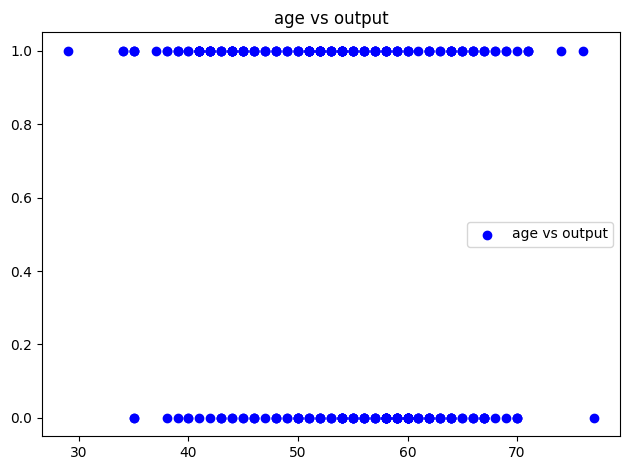

In [8]:
df = pd.DataFrame(data1)

# age vs output
plt.subplot(1, 1, 1)
plt.scatter(df['age'], df['output'], color='blue', label='age vs output')
plt.title('age vs output')
plt.legend()
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Le mode (en anglais : mode):
Le mode est la valeur la plus fréquente dans un ensemble de données. C'est la valeur qui apparaît le plus souvent.
Exemple : Considérez l'ensemble de données {1, 2, 2, 3, 3, 3, 4}. Le mode est 3 car c'est la valeur qui apparaît le plus souvent (3 fois).

### La moyenne (en anglais : mean):
La moyenne est la somme de toutes les valeurs dans un ensemble de données divisée par le nombre de valeurs. C'est une mesure de la tendance centrale des données.
Exemple : Considérez l'ensemble de données {1, 2, 3, 4, 5}. La moyenne est calculée comme suit : (1 + 2 + 3 + 4 + 5) / 5 = 3.

### La médiane (en anglais : median):
La médiane est la valeur qui divise un ensemble de données ordonnées en deux moitiés égales. La moitié des valeurs est inférieure à la médiane et l'autre moitié est supérieure.
Exemple : Considérez l'ensemble de données {1, 2, 2, 3, 4, 5}. En premier lieu, on ordonne les données : {1, 2, 2, 3, 4, 5}. La médiane est alors la valeur du milieu, soit 3.

### NB: 
--> Le mode, la moyenne et la médiane sont des mesures de tendance centrale, mais elles peuvent donner des informations différentes sur les données. 

--> Le mode est utile pour identifier la valeur la plus courante, tandis que la moyenne et la médiane peuvent être plus sensibles aux valeurs extrêmes (valeurs très hautes ou très basses).

--> Le choix de la mesure de tendance centrale la plus appropriée dépend de la nature des données et de la question à laquelle on tente de répondre.

In [9]:
# Calculate mode, mean, and median for each attribute
for col in data1.columns:
    mode = data1[col].mode()[0]
    mean = data1[col].mean()
    median = data1[col].median()
    print(f"Attribute: {col}")
    print(f"\tMode: {mode}")
    print(f"\tMean: {mean}")
    print(f"\tMedian: {median}")
    print("-"*20)

Attribute: age
	Mode: 54
	Mean: 54.01038062283737
	Median: 54.0
--------------------
Attribute: sex
	Mode: 1
	Mean: 0.6782006920415224
	Median: 1.0
--------------------
Attribute: cp
	Mode: 0
	Mean: 1.0207612456747406
	Median: 1.0
--------------------
Attribute: trtbps
	Mode: 120
	Mean: 131.37716262975778
	Median: 130.0
--------------------
Attribute: chol
	Mode: 204
	Mean: 247.96193771626298
	Median: 243.0
--------------------
Attribute: fbs
	Mode: 0
	Mean: 0.1453287197231834
	Median: 0.0
--------------------
Attribute: restecg
	Mode: 1
	Mean: 0.5155709342560554
	Median: 1.0
--------------------
Attribute: thalachh
	Mode: 162
	Mean: 150.2318339100346
	Median: 154.0
--------------------
Attribute: exng
	Mode: 0
	Mean: 0.31833910034602075
	Median: 0.0
--------------------
Attribute: oldpeak
	Mode: 0.0
	Mean: 1.0076124567474047
	Median: 0.6
--------------------
Attribute: slp
	Mode: 2
	Mean: 1.4186851211072664
	Median: 1.0
--------------------
Attribute: caa
	Mode: 0
	Mean: 0.71280276816

### Normalisation par MIN/MAX:

Cette méthode met à l'échelle les données entre 0 et 1 en soustrayant la valeur minimale et en divisant par la différence entre la valeur maximale et minimale. La formule est la suivante :

valeur normalisée = (valeur d'origine - valeur minimale) / (valeur maximale - valeur minimale)

#### Avantages:
Simple à comprendre et à mettre en œuvre

Préserve la forme de la distribution des données

Utile pour les données qui ne sont pas nécessairement distribuées normalement

#### Inconvénients:
Sensible aux valeurs aberrantes

Ne garantit pas que les données auront une moyenne de 0 et un écart-type de 1

### Normalisation par Z-score:

Cette méthode centre les données autour de la moyenne et les met à l'échelle par rapport à l'écart-type. La formule est la suivante:

valeur normalisée = (valeur d'origine - moyenne) / écart-type

#### Avantages:

Permet d'obtenir des données avec une moyenne de 0 et un écart-type de 1

Utile pour comparer des données provenant de différentes distributions

Moins sensible aux valeurs aberrantes que la normalisation par MIN/MAX

#### Inconvénients:

Plus complexe à mettre en œuvre que la normalisation par MIN/MAX

Ne préserve pas la forme de la distribution des données

### NB 
Le choix de la méthode de normalisation dépend de plusieurs facteurs, notamment:

--> Le type de données

--> La distribution des données

--> Les objectifs de l'analyse

In [10]:
import numpy as np

data = np.array([1, 2, 3, 4, 5])

# Normalisation par MIN/MAX
min_max_normalized_data = (data - data.min()) / (data.max() - data.min())

# Normalisation par Z-score
z_score_normalized_data = (data - data.mean()) / data.std()

print("Données originales:", data)
print("Données normalisées par MIN/MAX:", min_max_normalized_data)
print("Données normalisées par Z-score:", z_score_normalized_data)

Données originales: [1 2 3 4 5]
Données normalisées par MIN/MAX: [0.   0.25 0.5  0.75 1.  ]
Données normalisées par Z-score: [-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
